# YN Μέρος Α

## A1

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")


In [3]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(2149, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

In [8]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [9]:
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [10]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))  
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])


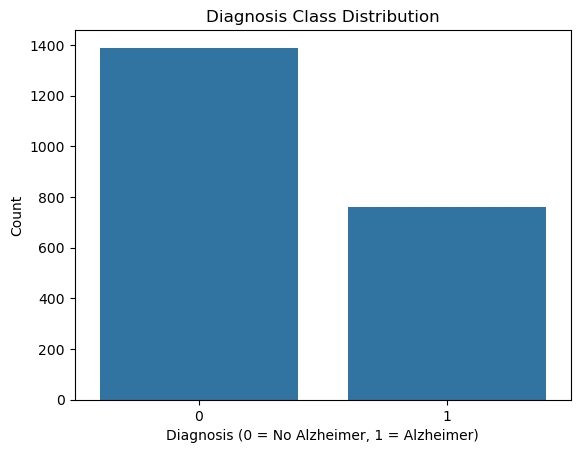

In [11]:
sns.countplot(x=y)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (0 = No Alzheimer, 1 = Alzheimer)")
plt.ylabel("Count")
plt.show()


C:\Users\nozix\AppData\Local\Temp\ipykernel_6920\1613871636.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


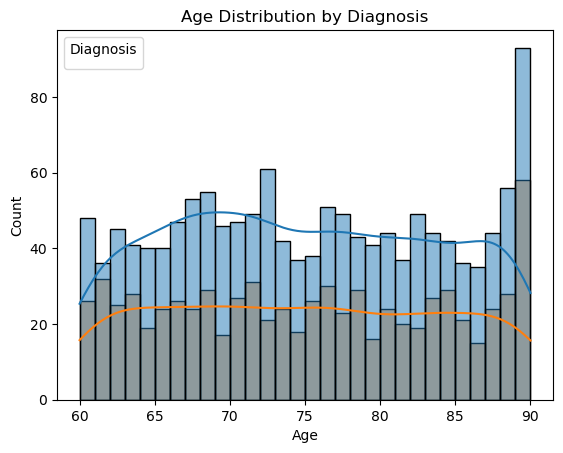

C:\Users\nozix\AppData\Local\Temp\ipykernel_6920\1613871636.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


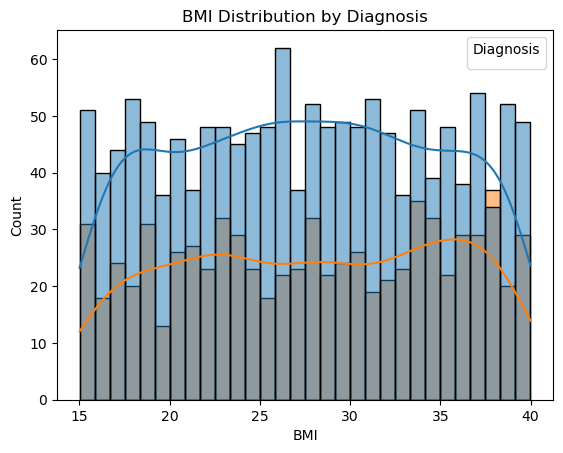

C:\Users\nozix\AppData\Local\Temp\ipykernel_6920\1613871636.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


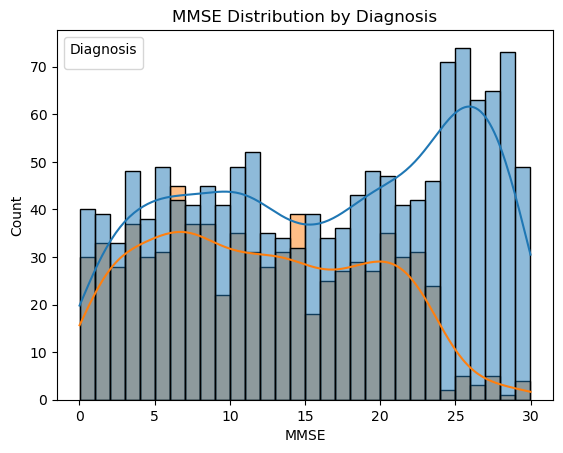

C:\Users\nozix\AppData\Local\Temp\ipykernel_6920\1613871636.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnosis")


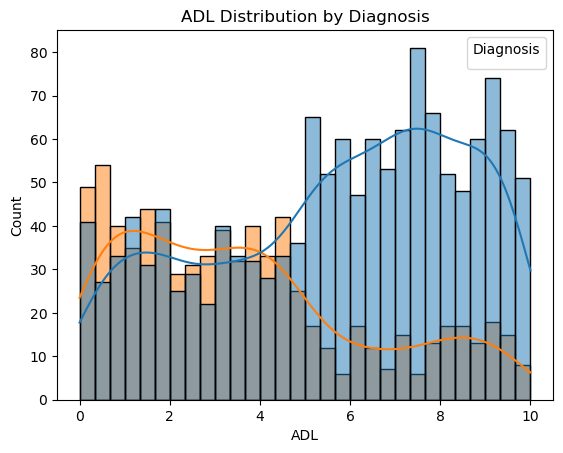

In [12]:
key_features = ["Age", "BMI", "MMSE", "ADL"]
for feature in key_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue="Diagnosis", bins=30, kde=True)
    plt.title(f"{feature} Distribution by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Diagnosis")
    plt.show()


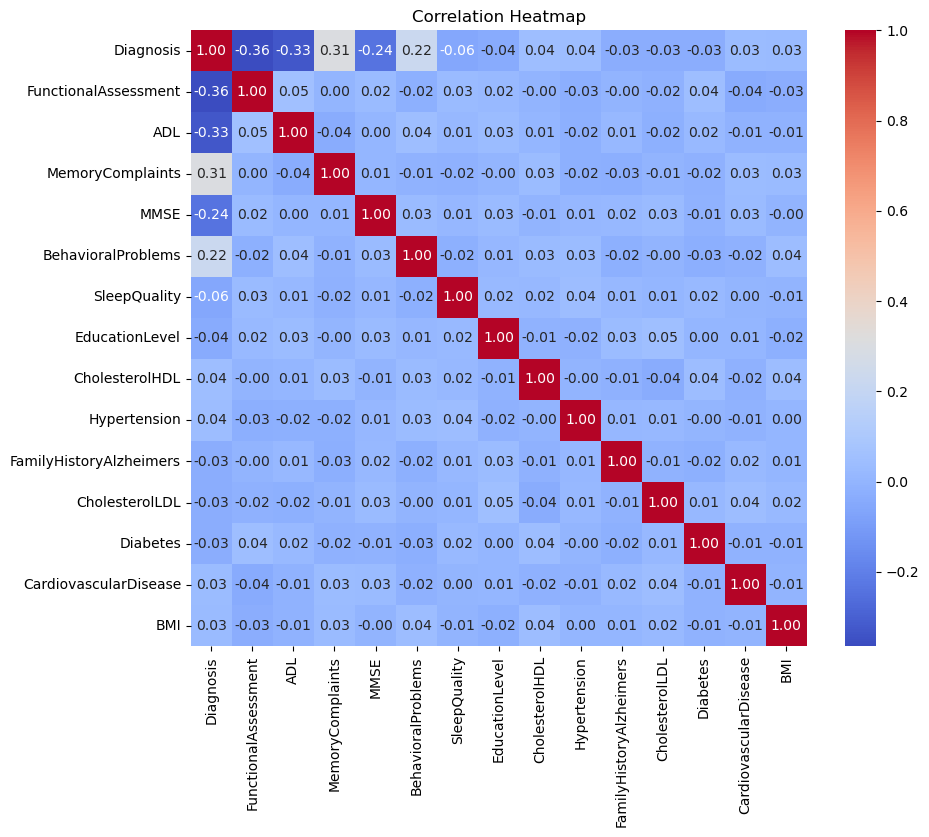

In [14]:
# top features correlated to diagnosis
corr_matrix = df.corr()
top_corr_features = corr_matrix["Diagnosis"].abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X, y = shuffle(X, y, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}:")
    print(f"  Train size: {len(train_idx)}")
    print(f"  Test size:  {len(test_idx)}\n")

Fold 1:
  Train size: 1719
  Test size:  430

Fold 2:
  Train size: 1719
  Test size:  430

Fold 3:
  Train size: 1719
  Test size:  430

Fold 4:
  Train size: 1719
  Test size:  430

Fold 5:
  Train size: 1720
  Test size:  429



## A2

In [16]:
def build_model(input_dim, hidden_units=16, hidden_activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units, activation=hidden_activation))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [17]:
def train_with_cv(X, y, preprocessor, hidden_units=16, activation='relu', learning_rate=0.001, epochs=50):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ce_losses, mse_scores, acc_scores = [], [], []
    history_per_fold = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Fold {fold}")

        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = preprocessor.fit_transform(X_train_raw)
        X_test = preprocessor.transform(X_test_raw)

        model = build_model(input_dim=X_train.shape[1],
                            hidden_units=hidden_units,
                            hidden_activation=activation,
                            learning_rate=learning_rate)

        history = model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=epochs, verbose=0)

        y_pred_prob = model.predict(X_test).flatten()
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        ce_losses.append(log_loss(y_test, y_pred_prob))
        mse_scores.append(mean_squared_error(y_test, y_pred_prob))
        acc_scores.append(accuracy_score(y_test, y_pred_class))
        history_per_fold.append(history.history)

        print(f"CE Loss: {ce_losses[-1]:.4f}, MSE: {mse_scores[-1]:.4f}, Acc: {acc_scores[-1]:.4f}")

    avg_loss = np.mean([np.array(h['loss']) for h in history_per_fold], axis=0)
    avg_val_loss = np.mean([np.array(h['val_loss']) for h in history_per_fold], axis=0)

    plt.plot(avg_loss, label='Train CE Loss')
    plt.plot(avg_val_loss, label='Val CE Loss')
    plt.title(f'CE Loss (H={hidden_units}, act={activation})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return {
        'CE': np.mean(ce_losses),
        'MSE': np.mean(mse_scores),
        'Acc': np.mean(acc_scores)
    }



📊 A2ε Results Table:

🔧 Training model with H = 18

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4100, MSE: 0.1265, Acc: 0.8256

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3930, MSE: 0.1189, Acc: 0.8349

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4281, MSE: 0.1223, Acc: 0.8372

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4121, MSE: 0.1176, Acc: 0.8395

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4190, MSE: 0.1329, Acc: 0.8228


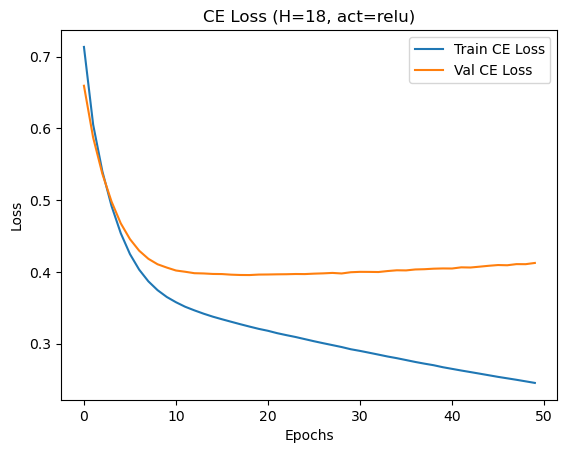

Results → CE: 0.4125, MSE: 0.1236, Acc: 0.8320

🔧 Training model with H = 36

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.3898, MSE: 0.1187, Acc: 0.8326

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3972, MSE: 0.1148, Acc: 0.8535

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4423, MSE: 0.1259, Acc: 0.8209

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4017, MSE: 0.1161, Acc: 0.8558

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4012, MSE: 0.1228, Acc: 0.8322


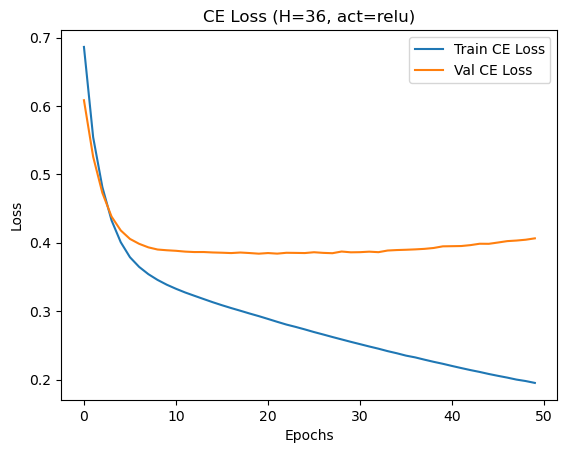

Results → CE: 0.4064, MSE: 0.1197, Acc: 0.8390

🔧 Training model with H = 72

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4697, MSE: 0.1327, Acc: 0.8302

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4975, MSE: 0.1388, Acc: 0.8233

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4897, MSE: 0.1319, Acc: 0.8209

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4756, MSE: 0.1200, Acc: 0.8442

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4507, MSE: 0.1325, Acc: 0.8252


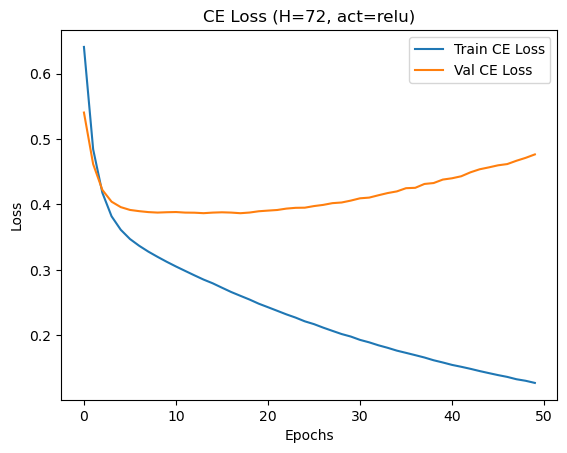

Results → CE: 0.4766, MSE: 0.1312, Acc: 0.8288


In [22]:
#relu as activation
input_size = preprocessor.fit_transform(X).shape[1]
hidden_sizes = [input_size // 2, input_size, input_size * 2]
activation = 'relu'

print("\n📊 A2ε Results Table:")
for H in hidden_sizes:
    print(f"\n🔧 Training model with H = {H}")
    results = train_with_cv(X, y, preprocessor, hidden_units=H, activation=activation)
    print(f"Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")


📊 A2ε Results Table:

🔧 Training model with H = 18

🔁 Fold 1
14/14 [==============================] - 0s 3ms/step
CE Loss: 0.3865, MSE: 0.1220, Acc: 0.8140

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3899, MSE: 0.1187, Acc: 0.8395

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4260, MSE: 0.1245, Acc: 0.8349

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3864, MSE: 0.1172, Acc: 0.8395

🔁 Fold 5
14/14 [==============================] - 0s 921us/step
CE Loss: 0.4203, MSE: 0.1331, Acc: 0.7972


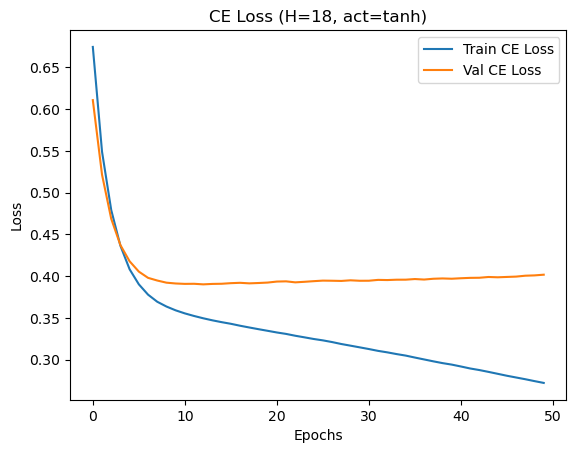

Results → CE: 0.4018, MSE: 0.1231, Acc: 0.8250

🔧 Training model with H = 36

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4095, MSE: 0.1285, Acc: 0.8070

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4133, MSE: 0.1211, Acc: 0.8395

🔁 Fold 3
14/14 [==============================] - 0s 3ms/step
CE Loss: 0.4649, MSE: 0.1348, Acc: 0.8163

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4101, MSE: 0.1220, Acc: 0.8326

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4319, MSE: 0.1365, Acc: 0.7972


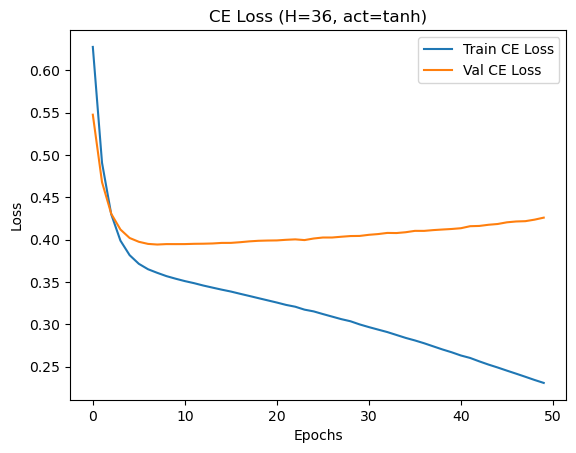

Results → CE: 0.4259, MSE: 0.1286, Acc: 0.8185

🔧 Training model with H = 72

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.3707, MSE: 0.1109, Acc: 0.8372

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3809, MSE: 0.1141, Acc: 0.8465

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4315, MSE: 0.1218, Acc: 0.8326

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3952, MSE: 0.1156, Acc: 0.8395

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4329, MSE: 0.1349, Acc: 0.8135


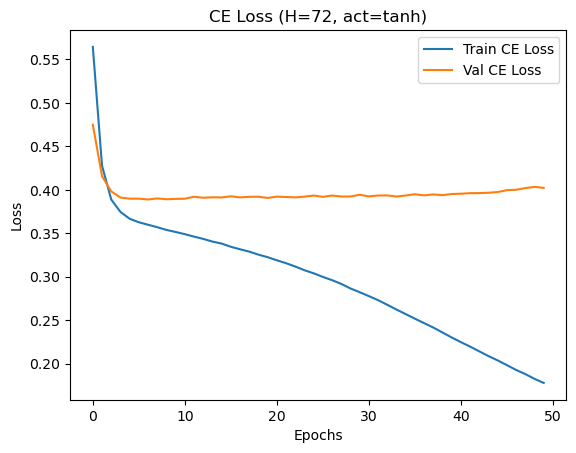

Results → CE: 0.4022, MSE: 0.1195, Acc: 0.8339


In [24]:
# tanh as activation
input_size = preprocessor.fit_transform(X).shape[1]
hidden_sizes = [input_size // 2, input_size, input_size * 2]
activation = 'tanh'

print("\n📊 A2ε Results Table:")
for H in hidden_sizes:
    print(f"\n🔧 Training model with H = {H}")
    results = train_with_cv(X, y, preprocessor, hidden_units=H, activation=activation)
    print(f"Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")


📊 A2ε Results Table:

🔧 Training model with H = 18

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3780, MSE: 0.1138, Acc: 0.8372

🔁 Fold 2
14/14 [==============================] - 0s 997us/step
CE Loss: 0.3988, MSE: 0.1217, Acc: 0.8349

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4237, MSE: 0.1188, Acc: 0.8349

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.3904, MSE: 0.1057, Acc: 0.8651

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4126, MSE: 0.1307, Acc: 0.8065


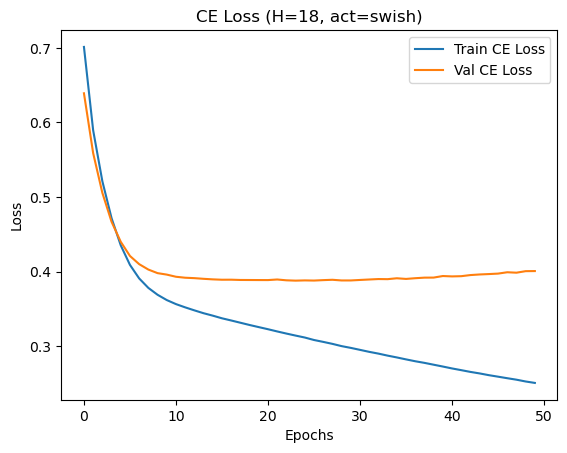

Results → CE: 0.4007, MSE: 0.1182, Acc: 0.8357

🔧 Training model with H = 36

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4032, MSE: 0.1198, Acc: 0.8349

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4426, MSE: 0.1301, Acc: 0.8233

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4358, MSE: 0.1221, Acc: 0.8395

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4218, MSE: 0.1135, Acc: 0.8395

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4366, MSE: 0.1342, Acc: 0.8159


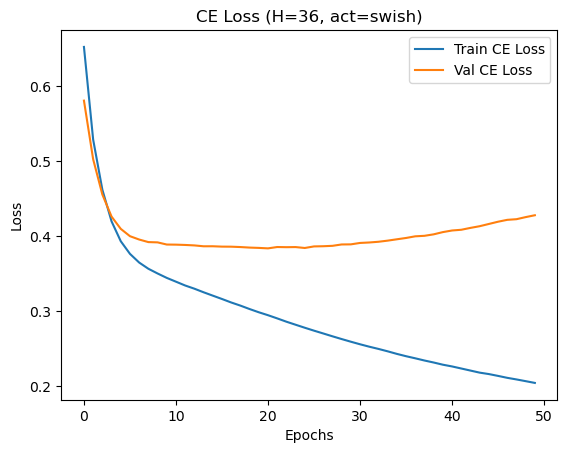

Results → CE: 0.4280, MSE: 0.1239, Acc: 0.8306

🔧 Training model with H = 72

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4521, MSE: 0.1250, Acc: 0.8372

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.5029, MSE: 0.1442, Acc: 0.8047

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4958, MSE: 0.1326, Acc: 0.8256

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE Loss: 0.4684, MSE: 0.1216, Acc: 0.8349

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE Loss: 0.4393, MSE: 0.1295, Acc: 0.8228


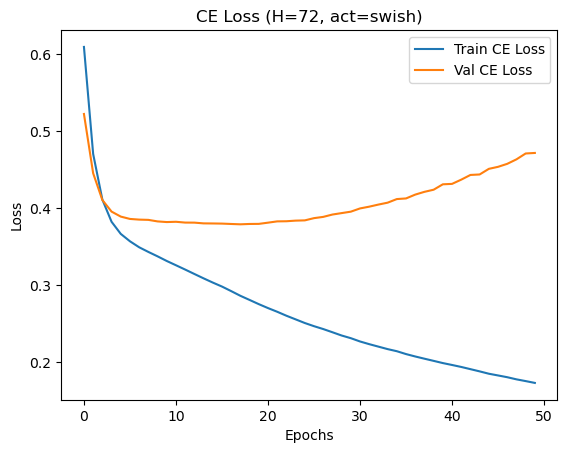

Results → CE: 0.4717, MSE: 0.1306, Acc: 0.8250


In [25]:
#silu as activation
input_size = preprocessor.fit_transform(X).shape[1]
hidden_sizes = [input_size // 2, input_size, input_size * 2]
activation = 'swish'

print("\n📊 A2ε Results Table:")
for H in hidden_sizes:
    print(f"\n🔧 Training model with H = {H}")
    results = train_with_cv(X, y, preprocessor, hidden_units=H, activation=activation)
    print(f"Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")

In [30]:
# adding the early stopping
def train_with_cv(X, y, preprocessor, hidden_units=16, activation='relu', learning_rate=0.001, momentum=0.0, epochs=50):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ce_losses, mse_scores, acc_scores = [], [], []
    history_per_fold = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Fold {fold}")

        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = preprocessor.fit_transform(X_train_raw)
        X_test = preprocessor.transform(X_test_raw)

        model = build_model(input_dim=X_train.shape[1],
                            hidden_units=hidden_units,
                            hidden_activation=activation,
                            learning_rate=learning_rate)

        early_stop = EarlyStopping(
                            monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

        history = model.fit(
                            X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=epochs,
                            callbacks=[early_stop],
                            verbose=0)

        
        history_per_fold.append(history.history)

       
        y_pred_prob = model.predict(X_test).flatten()
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        ce = log_loss(y_test, y_pred_prob)
        mse = mean_squared_error(y_test, y_pred_prob)
        acc = accuracy_score(y_test, y_pred_class)

        ce_losses.append(ce)
        mse_scores.append(mse)
        acc_scores.append(acc)

        print(f"CE: {ce:.4f} | MSE: {mse:.4f} | Acc: {acc:.4f}")

    
    plt.figure(figsize=(10, 6))
    for i, h in enumerate(history_per_fold):
        plt.plot(h['val_loss'], label=f'Fold {i+1}')
    plt.title(f'Validation CE Loss per Fold (H={hidden_units}, act={activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

    return {
        'CE': np.mean(ce_losses),
        'MSE': np.mean(mse_scores),
        'Acc': np.mean(acc_scores)
    }


📊  Results Table with early stopping:

🔧 Training model with H = 18

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE: 0.3704 | MSE: 0.1148 | Acc: 0.8419

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3957 | MSE: 0.1216 | Acc: 0.8372

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE: 0.4232 | MSE: 0.1271 | Acc: 0.8349

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.3761 | MSE: 0.1102 | Acc: 0.8488

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE: 0.4067 | MSE: 0.1294 | Acc: 0.8135


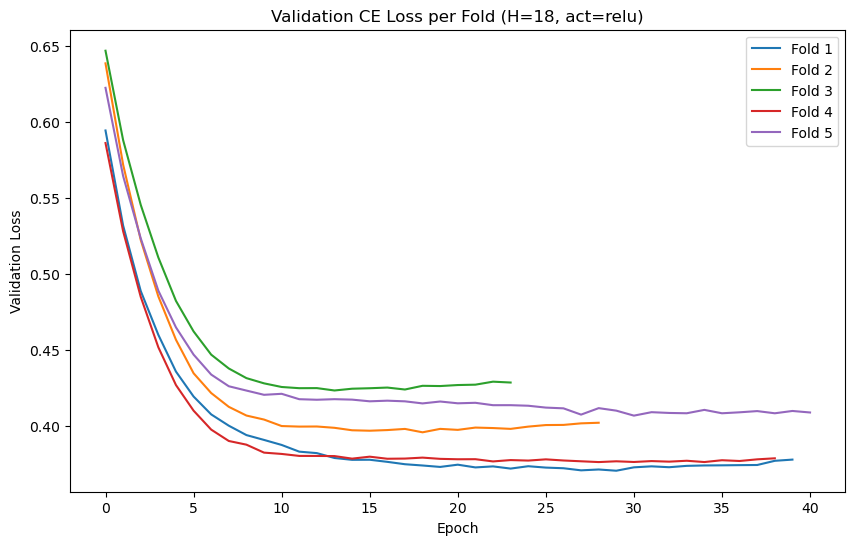

Results → CE: 0.3944, MSE: 0.1206, Acc: 0.8353

🔧 Training model with H = 36

🔁 Fold 1
14/14 [==============================] - 0s 3ms/step
CE: 0.3573 | MSE: 0.1081 | Acc: 0.8512

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3675 | MSE: 0.1115 | Acc: 0.8395

🔁 Fold 3
14/14 [==============================] - 0s 3ms/step
CE: 0.3973 | MSE: 0.1193 | Acc: 0.8442

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.3784 | MSE: 0.1126 | Acc: 0.8581

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4091 | MSE: 0.1296 | Acc: 0.7949


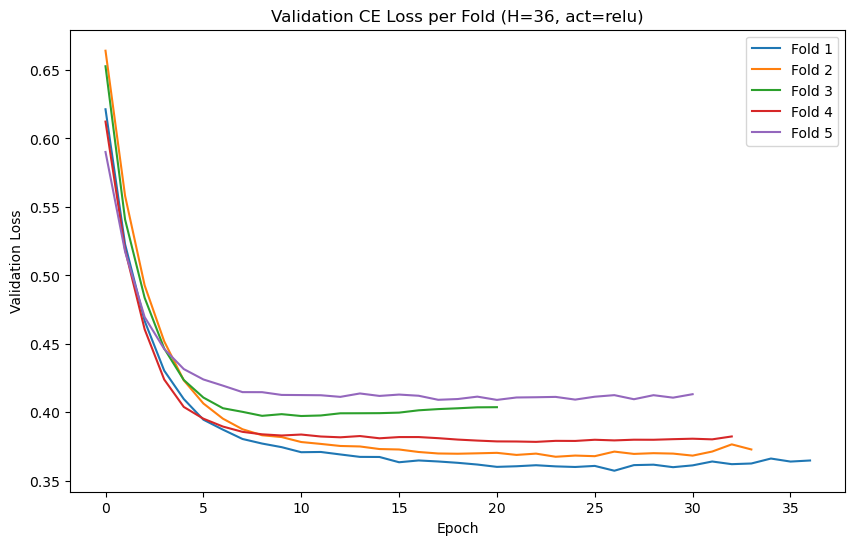

Results → CE: 0.3819, MSE: 0.1162, Acc: 0.8376

🔧 Training model with H = 72

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3735 | MSE: 0.1162 | Acc: 0.8256

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3718 | MSE: 0.1134 | Acc: 0.8465

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4100 | MSE: 0.1249 | Acc: 0.8209

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.3857 | MSE: 0.1147 | Acc: 0.8465

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.3987 | MSE: 0.1240 | Acc: 0.8089


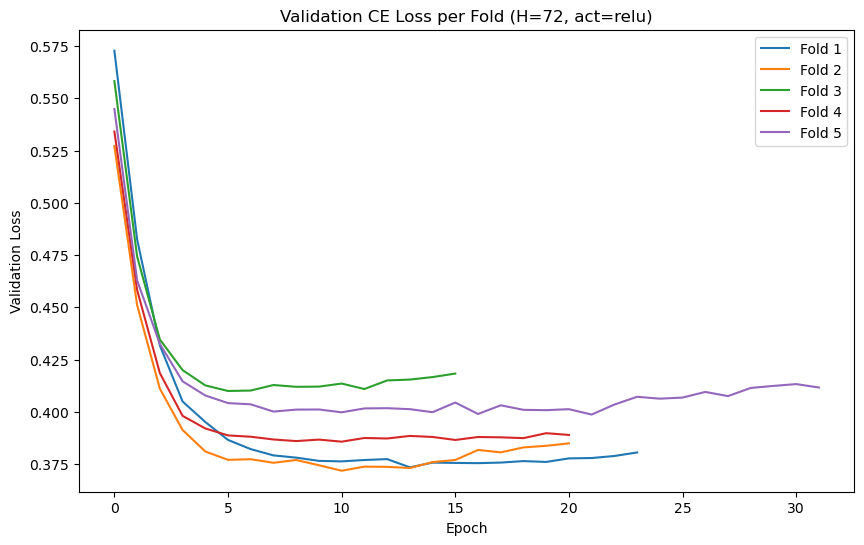

Results → CE: 0.3880, MSE: 0.1186, Acc: 0.8297


In [32]:
#relu as activation and early stopping
input_size = preprocessor.fit_transform(X).shape[1]
hidden_sizes = [input_size // 2, input_size, input_size * 2]
activation = 'relu'

print("\n📊  Results Table with early stopping:")
for H in hidden_sizes:
    print(f"\n🔧 Training model with H = {H}")
    results = train_with_cv(X, y, preprocessor, hidden_units=H, activation=activation)
    print(f"Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")

## A3

In [35]:
def build_model_A3(input_dim, hidden_units=16, hidden_activation='relu', learning_rate=0.001, momentum=0.0):
    
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units, activation=hidden_activation))
    model.add(Dense(1, activation='sigmoid'))

    
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [45]:

def train_with_cv(X, y, preprocessor, hidden_units=16, activation='relu', learning_rate=0.001, momentum=0.0, epochs=50, l2_strength=0.0):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ce_losses, mse_scores, acc_scores = [], [], []
    history_per_fold = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Fold {fold}")

        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = preprocessor.fit_transform(X_train_raw)
        X_test = preprocessor.transform(X_test_raw)

        model = build_model(input_dim=X_train.shape[1],
                            hidden_units=hidden_units,
                            hidden_activation=activation,
                            learning_rate=learning_rate,
                            momentum=momentum,
                            l2_strength=l2_strength
                           )

        early_stop = EarlyStopping(
                            monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

        history = model.fit(
                            X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=epochs,
                            callbacks=[early_stop],
                            verbose=0)

        
        history_per_fold.append(history.history)

       
        y_pred_prob = model.predict(X_test).flatten()
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        ce = log_loss(y_test, y_pred_prob)
        mse = mean_squared_error(y_test, y_pred_prob)
        acc = accuracy_score(y_test, y_pred_class)

        ce_losses.append(ce)
        mse_scores.append(mse)
        acc_scores.append(acc)

        print(f"CE: {ce:.4f} | MSE: {mse:.4f} | Acc: {acc:.4f}")

    
    plt.figure(figsize=(10, 6))
    for i, h in enumerate(history_per_fold):
        plt.plot(h['val_loss'], label=f'Fold {i+1}')
    plt.title(f'Validation CE Loss per Fold (H={hidden_units}, act={activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

    return {
        'CE': np.mean(ce_losses),
        'MSE': np.mean(mse_scores),
        'Acc': np.mean(acc_scores)
    }


🚀 Training with η = 0.001, momentum = 0.2

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.4650 | MSE: 0.1489 | Acc: 0.8093

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.4423 | MSE: 0.1418 | Acc: 0.8093

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4809 | MSE: 0.1547 | Acc: 0.7884

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.4595 | MSE: 0.1474 | Acc: 0.8047

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4830 | MSE: 0.1580 | Acc: 0.7599


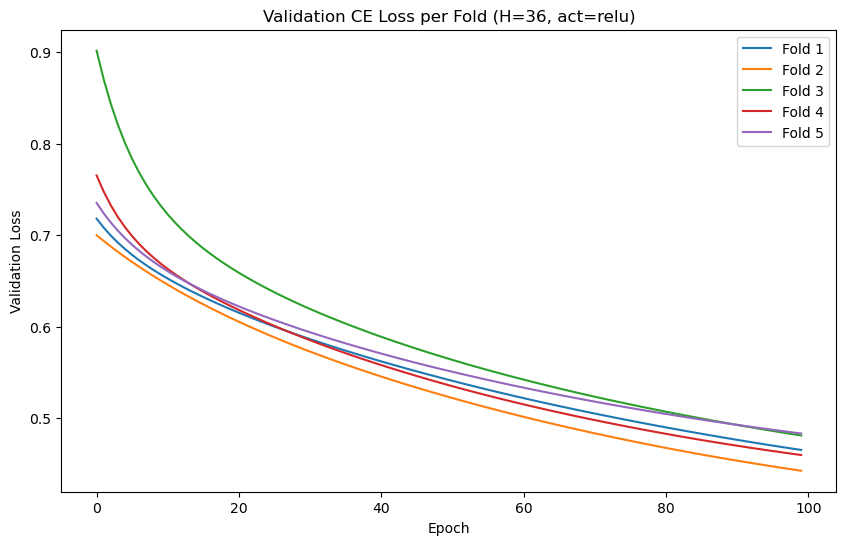

📊 Results → CE: 0.4661, MSE: 0.1502, Acc: 0.7943

🚀 Training with η = 0.001, momentum = 0.6

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3959 | MSE: 0.1245 | Acc: 0.8256

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.3801 | MSE: 0.1185 | Acc: 0.8465

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4099 | MSE: 0.1255 | Acc: 0.8465

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.4123 | MSE: 0.1308 | Acc: 0.7977

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4220 | MSE: 0.1362 | Acc: 0.7879


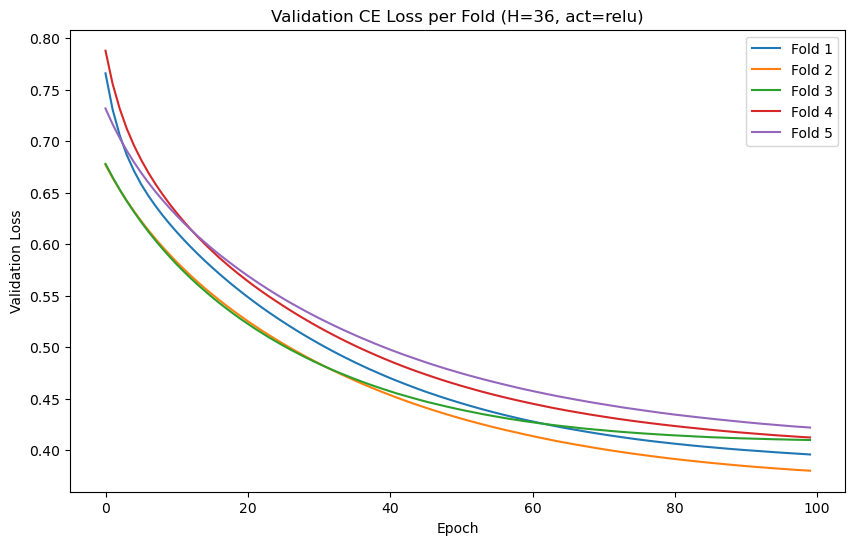

📊 Results → CE: 0.4040, MSE: 0.1271, Acc: 0.8208

🚀 Training with η = 0.05, momentum = 0.6

🔁 Fold 1
14/14 [==============================] - 0s 997us/step
CE: 0.3635 | MSE: 0.1132 | Acc: 0.8395

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.3711 | MSE: 0.1109 | Acc: 0.8628

🔁 Fold 3
14/14 [==============================] - 0s 997us/step
CE: 0.4183 | MSE: 0.1236 | Acc: 0.8349

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3747 | MSE: 0.1123 | Acc: 0.8535

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4043 | MSE: 0.1238 | Acc: 0.8205


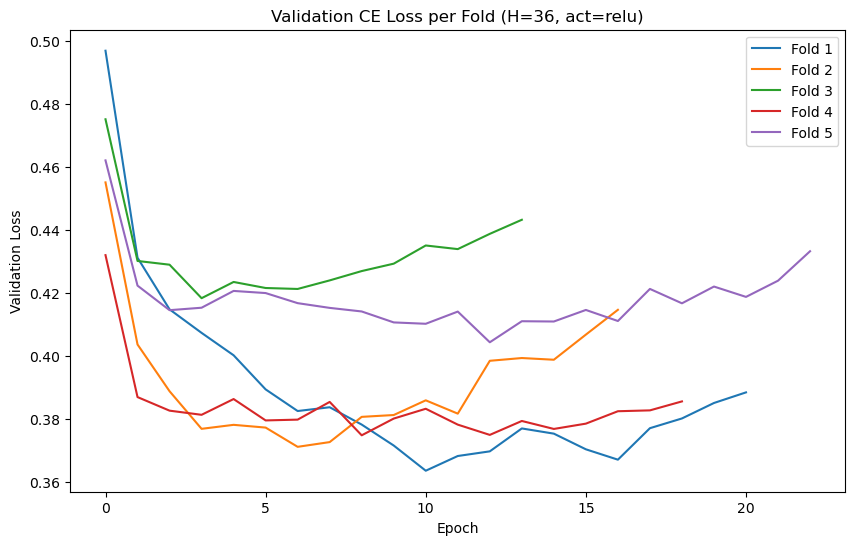

📊 Results → CE: 0.3864, MSE: 0.1168, Acc: 0.8422

🚀 Training with η = 0.1, momentum = 0.6

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3637 | MSE: 0.1136 | Acc: 0.8465

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.3722 | MSE: 0.1137 | Acc: 0.8442

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.3890 | MSE: 0.1101 | Acc: 0.8535

🔁 Fold 4
14/14 [==============================] - 0s 997us/step
CE: 0.3743 | MSE: 0.1164 | Acc: 0.8349

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4024 | MSE: 0.1214 | Acc: 0.8322


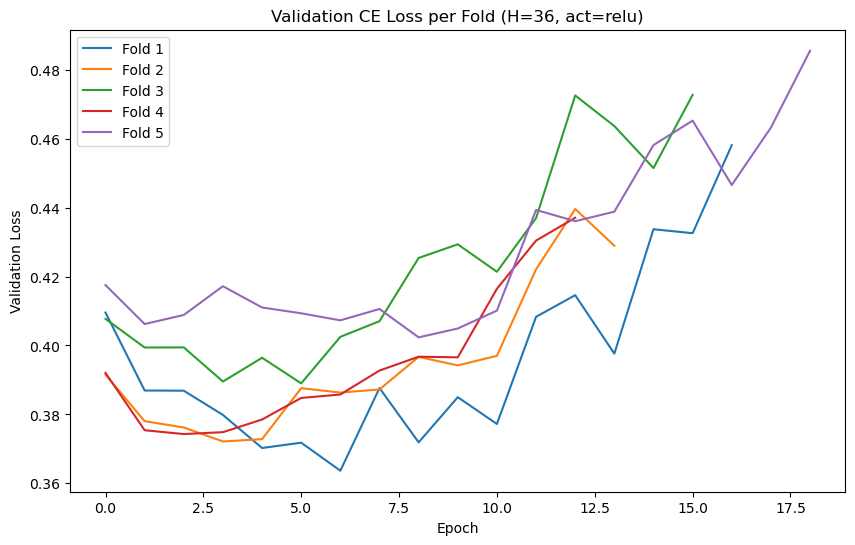

📊 Results → CE: 0.3803, MSE: 0.1150, Acc: 0.8422


In [46]:
lr_momentum_combos = [
    (0.001, 0.2),
    (0.001, 0.6),
    (0.05, 0.6),
    (0.1, 0.6)
]

input_size = preprocessor.fit_transform(X).shape[1]
H = input_size           
activation = 'relu'      


for lr, m in lr_momentum_combos:
    print(f"\n🚀 Training with η = {lr}, momentum = {m}")
    results = train_with_cv(
        X, y,
        preprocessor=preprocessor,
        hidden_units=H,
        activation=activation,
        learning_rate=lr,
        epochs=100,           
        momentum=m            
    )

    print(f"📊 Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")

## Α4

In [47]:
def build_model(input_dim, hidden_units=16, hidden_activation='relu',
                learning_rate=0.1, momentum=0.6, l2_strength=0.0):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units,
                    activation=hidden_activation,
                    kernel_regularizer=l2(l2_strength)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [48]:

def train_with_cv(X, y, preprocessor, hidden_units=16, activation='relu', learning_rate=0.1, momentum=0.6, epochs=50, l2_strength=0.0):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ce_losses, mse_scores, acc_scores = [], [], []
    history_per_fold = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Fold {fold}")

        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = preprocessor.fit_transform(X_train_raw)
        X_test = preprocessor.transform(X_test_raw)

        model = build_model(input_dim=X_train.shape[1],
                            hidden_units=hidden_units,
                            hidden_activation=activation,
                            learning_rate=learning_rate,
                            momentum=momentum,
                            l2_strength=l2_strength
                           )

        early_stop = EarlyStopping(
                            monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

        history = model.fit(
                            X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=epochs,
                            callbacks=[early_stop],
                            verbose=0)

        
        history_per_fold.append(history.history)

       
        y_pred_prob = model.predict(X_test).flatten()
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        ce = log_loss(y_test, y_pred_prob)
        mse = mean_squared_error(y_test, y_pred_prob)
        acc = accuracy_score(y_test, y_pred_class)

        ce_losses.append(ce)
        mse_scores.append(mse)
        acc_scores.append(acc)

        print(f"CE: {ce:.4f} | MSE: {mse:.4f} | Acc: {acc:.4f}")

    
    plt.figure(figsize=(10, 6))
    for i, h in enumerate(history_per_fold):
        plt.plot(h['val_loss'], label=f'Fold {i+1}')
    plt.title(f'Validation CE Loss per Fold (H={hidden_units}, act={activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

    return {
        'CE': np.mean(ce_losses),
        'MSE': np.mean(mse_scores),
        'Acc': np.mean(acc_scores)
    }


🧪 Training with L2 λ = 0.0001

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.4102 | MSE: 0.1284 | Acc: 0.8279

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.4040 | MSE: 0.1262 | Acc: 0.8209

🔁 Fold 3
14/14 [==============================] - 0s 3ms/step
CE: 0.4125 | MSE: 0.1284 | Acc: 0.8326

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.4002 | MSE: 0.1239 | Acc: 0.8302

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4424 | MSE: 0.1419 | Acc: 0.7925


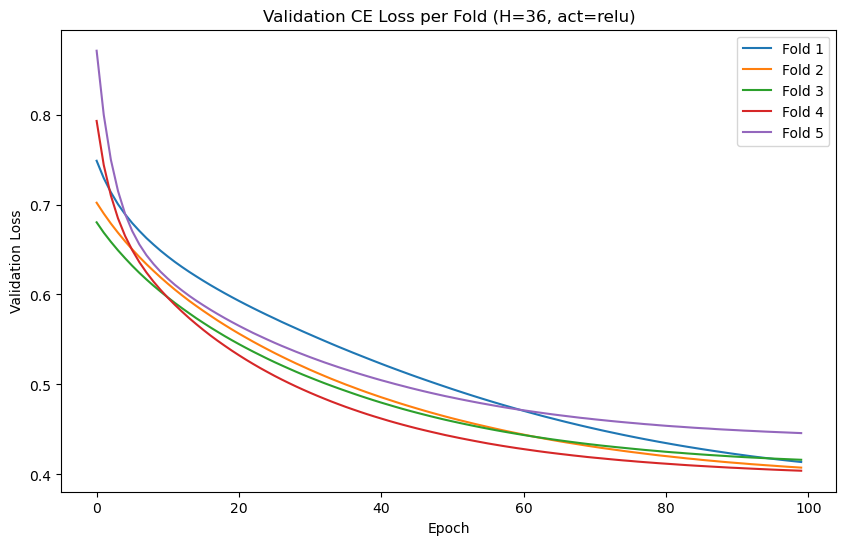

📊 Results → CE: 0.4139, MSE: 0.1298, Acc: 0.8208

🧪 Training with L2 λ = 0.001

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3871 | MSE: 0.1206 | Acc: 0.8209

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3979 | MSE: 0.1256 | Acc: 0.8116

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4271 | MSE: 0.1316 | Acc: 0.8279

🔁 Fold 4
14/14 [==============================] - 0s 1000us/step
CE: 0.4034 | MSE: 0.1252 | Acc: 0.8535

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE: 0.4342 | MSE: 0.1398 | Acc: 0.7925


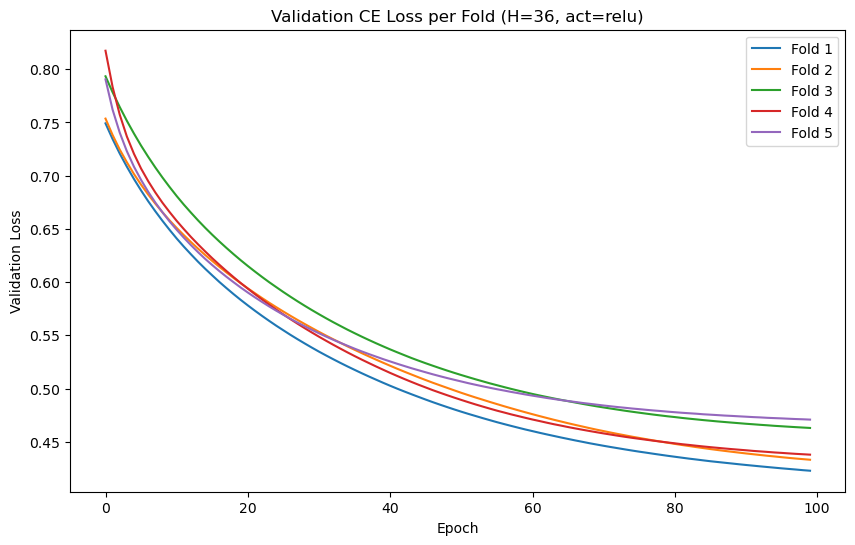

📊 Results → CE: 0.4100, MSE: 0.1286, Acc: 0.8213

🧪 Training with L2 λ = 0.01

🔁 Fold 1
14/14 [==============================] - 0s 997us/step
CE: 0.3890 | MSE: 0.1218 | Acc: 0.8256

🔁 Fold 2
14/14 [==============================] - 0s 997us/step
CE: 0.3964 | MSE: 0.1237 | Acc: 0.8395

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4206 | MSE: 0.1299 | Acc: 0.8209

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3923 | MSE: 0.1223 | Acc: 0.8279

🔁 Fold 5
14/14 [==============================] - 0s 921us/step
CE: 0.4135 | MSE: 0.1313 | Acc: 0.8159


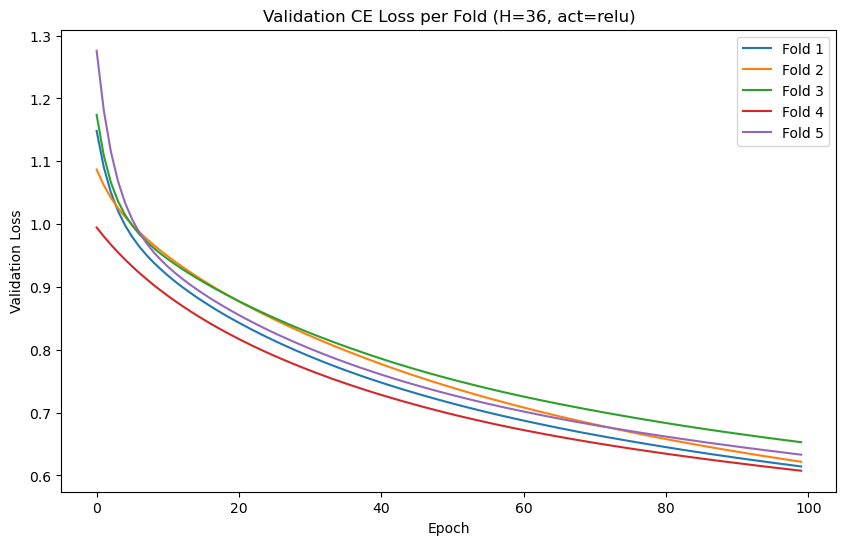

📊 Results → CE: 0.4024, MSE: 0.1258, Acc: 0.8260


In [49]:
input_size = preprocessor.fit_transform(X).shape[1]
H = input_size
activation = 'relu'
learning_rate = 0.001
momentum = 0.6


l2_values = [0.0001, 0.001, 0.01]


for l2_lambda in l2_values:
    print(f"\n🧪 Training with L2 λ = {l2_lambda}")
    results = train_with_cv(
        X, y,
        preprocessor=preprocessor,
        hidden_units=H,
        activation=activation,
        learning_rate=learning_rate,
        momentum=momentum,
        epochs=100,
        l2_strength=l2_lambda
    )
    print(f"📊 Results → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")

## A5

In [50]:
def build_model(input_dim, hidden_layers=[32], activation='relu',
                learning_rate=0.1, momentum=0.6, l2_strength=0.0):
    
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    for units in hidden_layers:
        model.add(Dense(units,
                        activation=activation,
                        kernel_regularizer=l2(l2_strength)))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [53]:

def train_with_cv(X, y, preprocessor, hidden_layers=[32], activation='relu', learning_rate=0.1, momentum=0.6, epochs=50, l2_strength=0.0):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    ce_losses, mse_scores, acc_scores = [], [], []
    history_per_fold = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Fold {fold}")

        X_train_raw, X_test_raw = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = preprocessor.fit_transform(X_train_raw)
        X_test = preprocessor.transform(X_test_raw)

        model = build_model(
                            input_dim=X_train.shape[1],
                            hidden_layers=hidden_layers,
                            activation=activation,
                            learning_rate=learning_rate,
                            momentum=momentum,
                            l2_strength=l2_strength
                        )

        early_stop = EarlyStopping(
                            monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

        history = model.fit(
                            X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=epochs,
                            callbacks=[early_stop],
                            verbose=0)

        
        history_per_fold.append(history.history)

       
        y_pred_prob = model.predict(X_test).flatten()
        y_pred_class = (y_pred_prob >= 0.5).astype(int)

        ce = log_loss(y_test, y_pred_prob)
        mse = mean_squared_error(y_test, y_pred_prob)
        acc = accuracy_score(y_test, y_pred_class)

        ce_losses.append(ce)
        mse_scores.append(mse)
        acc_scores.append(acc)

        print(f"CE: {ce:.4f} | MSE: {mse:.4f} | Acc: {acc:.4f}")

    
    plt.figure(figsize=(10, 6))
    for i, h in enumerate(history_per_fold):
        plt.plot(h['val_loss'], label=f'Fold {i+1}')
    plt.title(f'Validation CE Loss per Fold (H={hidden_layers}, act={activation})')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

    return {
        'CE': np.mean(ce_losses),
        'MSE': np.mean(mse_scores),
        'Acc': np.mean(acc_scores)
    }


 Testing Architecture D1: [I, I]

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE: 0.3698 | MSE: 0.1143 | Acc: 0.8395

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3853 | MSE: 0.1184 | Acc: 0.8326

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE: 0.4138 | MSE: 0.1228 | Acc: 0.8395

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.3962 | MSE: 0.1171 | Acc: 0.8442

🔁 Fold 5
14/14 [==============================] - 0s 3ms/step
CE: 0.3855 | MSE: 0.1219 | Acc: 0.8252


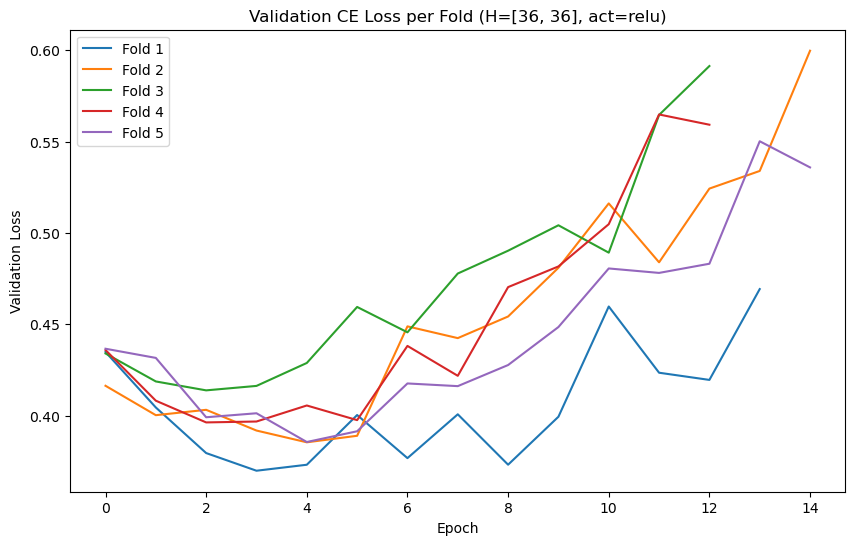

 D1: [I, I] → CE: 0.3901, MSE: 0.1189, Acc: 0.8362

 Testing Architecture D2: [I, I/2]

🔁 Fold 1
14/14 [==============================] - 0s 2ms/step
CE: 0.3861 | MSE: 0.1206 | Acc: 0.8070

🔁 Fold 2
14/14 [==============================] - 0s 3ms/step
CE: 0.3830 | MSE: 0.1154 | Acc: 0.8512

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE: 0.4220 | MSE: 0.1239 | Acc: 0.8372

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3985 | MSE: 0.1243 | Acc: 0.8233

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.4037 | MSE: 0.1238 | Acc: 0.8252


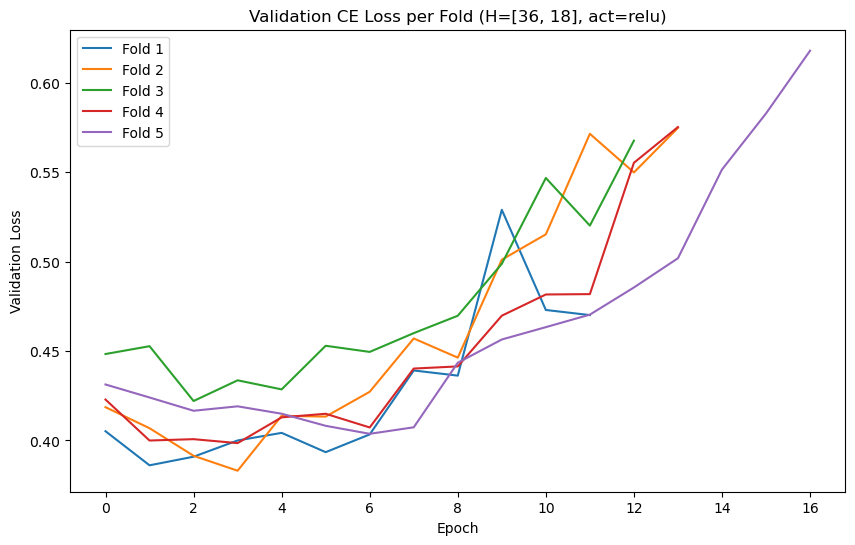

 D2: [I, I/2] → CE: 0.3987, MSE: 0.1216, Acc: 0.8288

 Testing Architecture D3: [I, I/2, I/4]

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3662 | MSE: 0.1138 | Acc: 0.8419

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.3799 | MSE: 0.1184 | Acc: 0.8256

🔁 Fold 3
14/14 [==============================] - 0s 1ms/step
CE: 0.4257 | MSE: 0.1276 | Acc: 0.8279

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3847 | MSE: 0.1089 | Acc: 0.8535

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE: 0.3972 | MSE: 0.1223 | Acc: 0.8228


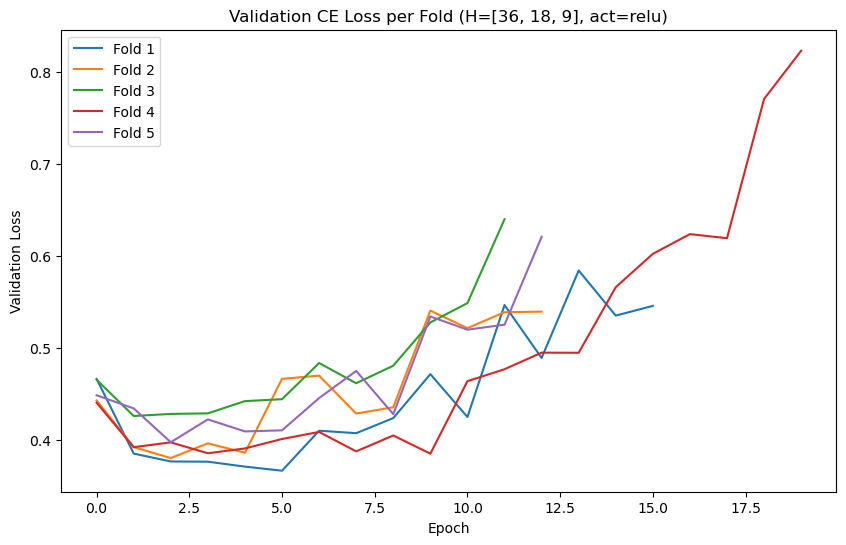

 D3: [I, I/2, I/4] → CE: 0.3907, MSE: 0.1182, Acc: 0.8343


In [54]:
input_size = preprocessor.fit_transform(X).shape[1]

architectures = {
    "D1: [I, I]":      [input_size, input_size],
    "D2: [I, I/2]":    [input_size, input_size // 2],
    "D3: [I, I/2, I/4]": [input_size, input_size // 2, input_size // 4]
}

for name, layers in architectures.items():
    print(f"\n Testing Architecture {name}")
    results = train_with_cv(
        X, y,
        preprocessor=preprocessor,
        hidden_layers=layers,
        activation='relu',
        learning_rate=0.1,
        momentum=0.6,
        epochs=100,
        l2_strength=0.0  
    )
    print(f" {name} → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")

#### Updated with L2 regularizer 


 Testing Architecture D1: [I, I]

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3208 | MSE: 0.0980 | Acc: 0.8674

🔁 Fold 2
14/14 [==============================] - 0s 2ms/step
CE: 0.3419 | MSE: 0.1038 | Acc: 0.8605

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE: 0.3572 | MSE: 0.1059 | Acc: 0.8651

🔁 Fold 4
14/14 [==============================] - 0s 2ms/step
CE: 0.3315 | MSE: 0.0959 | Acc: 0.8907

🔁 Fold 5
14/14 [==============================] - 0s 12ms/step
CE: 0.3483 | MSE: 0.1084 | Acc: 0.8508


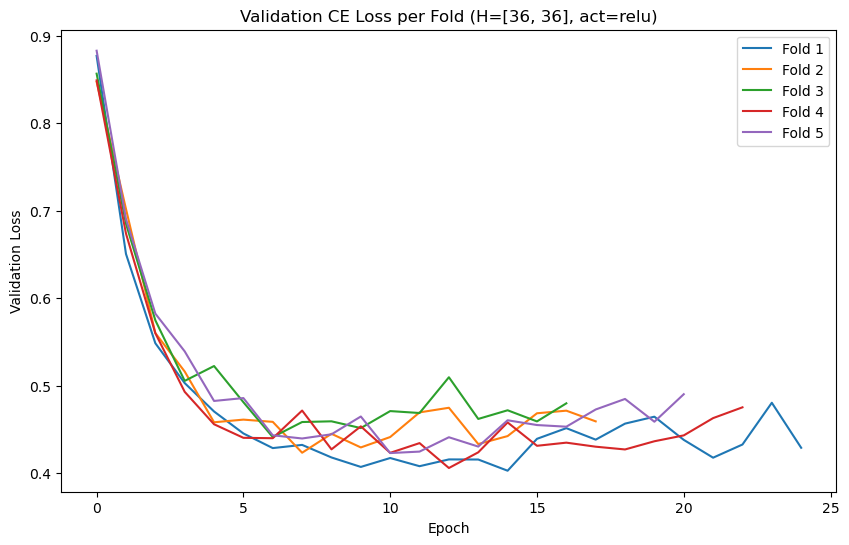

 D1: [I, I] → CE: 0.3400, MSE: 0.1024, Acc: 0.8669

 Testing Architecture D2: [I, I/2]

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3245 | MSE: 0.0993 | Acc: 0.8581

🔁 Fold 2
14/14 [==============================] - 0s 997us/step
CE: 0.3617 | MSE: 0.1118 | Acc: 0.8419

🔁 Fold 3
14/14 [==============================] - 0s 997us/step
CE: 0.3733 | MSE: 0.1075 | Acc: 0.8651

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3452 | MSE: 0.1021 | Acc: 0.8628

🔁 Fold 5
14/14 [==============================] - 0s 2ms/step
CE: 0.3448 | MSE: 0.1069 | Acc: 0.8298


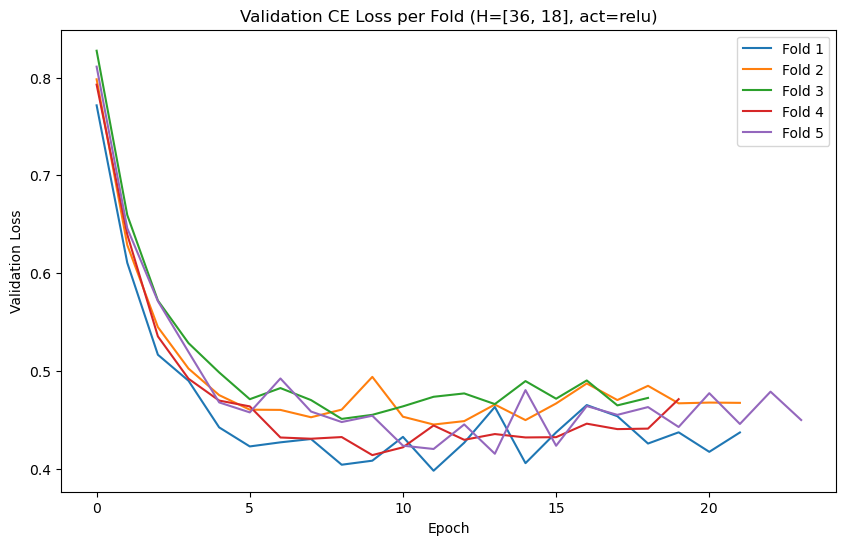

 D2: [I, I/2] → CE: 0.3499, MSE: 0.1055, Acc: 0.8515

 Testing Architecture D3: [I, I/2, I/4]

🔁 Fold 1
14/14 [==============================] - 0s 1ms/step
CE: 0.3354 | MSE: 0.1036 | Acc: 0.8581

🔁 Fold 2
14/14 [==============================] - 0s 1ms/step
CE: 0.3441 | MSE: 0.1029 | Acc: 0.8651

🔁 Fold 3
14/14 [==============================] - 0s 2ms/step
CE: 0.3612 | MSE: 0.1083 | Acc: 0.8488

🔁 Fold 4
14/14 [==============================] - 0s 1ms/step
CE: 0.3394 | MSE: 0.1007 | Acc: 0.8628

🔁 Fold 5
14/14 [==============================] - 0s 1ms/step
CE: 0.3405 | MSE: 0.1035 | Acc: 0.8555


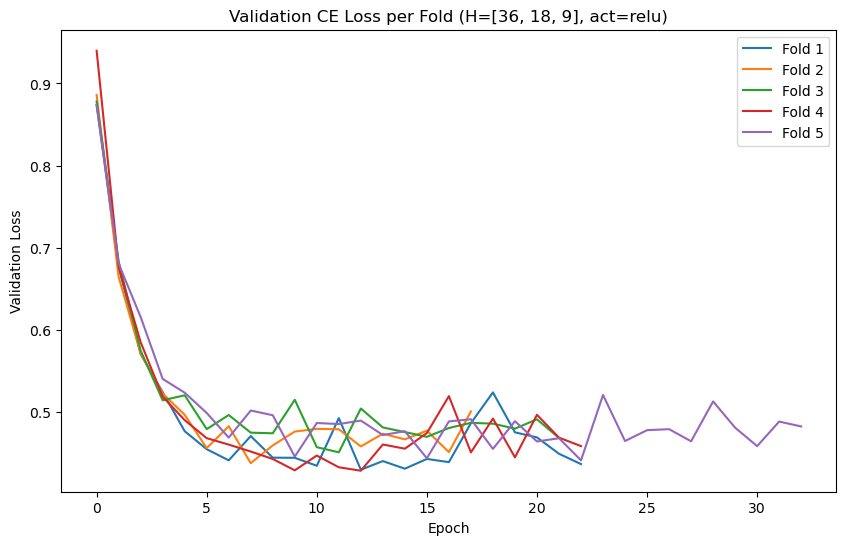

 D3: [I, I/2, I/4] → CE: 0.3441, MSE: 0.1038, Acc: 0.8581


In [56]:
input_size = preprocessor.fit_transform(X).shape[1]

architectures = {
    "D1: [I, I]":      [input_size, input_size],
    "D2: [I, I/2]":    [input_size, input_size // 2],
    "D3: [I, I/2, I/4]": [input_size, input_size // 2, input_size // 4]
}

for name, layers in architectures.items():
    print(f"\n Testing Architecture {name}")
    results = train_with_cv(
        X, y,
        preprocessor=preprocessor,
        hidden_layers=layers,
        activation='relu',
        learning_rate=0.1,
        momentum=0.6,
        epochs=100,
        l2_strength=0.01 
    )
    print(f" {name} → CE: {results['CE']:.4f}, MSE: {results['MSE']:.4f}, Acc: {results['Acc']:.4f}")